# Data@ANZ - ANZ Virtual Internship
## Exploratory Data Analysis - Task 1

<b> Roshan Wahane (Master of Data Science, Monash University)<br>
Date: 21/07/2020<br>
Email: [Redacted]<br>
Mobile: [Redacted]<br>
LinkedIn: https://www.linkedin.com/in/roshan-wahane/<br>
GitHub: https://github.com/roshanwahane<br>
Tableau: https://public.tableau.com/profile/roshan.wahane#!/<br></b>

## Table of Contents

* [Project objective](#sec_1)
* [Loading libraries and data](#sec_2)
* [Performing regular checks](#sec_3)
* [Data cleaning](#sec_4)
* [Overall insights](#sec_5)
* [Timeseries analysis](#sec_6)
* [Location analysis](#sec_7)

## 1. Project objective <a class="anchor" id="sec_1"></a>

<b>Exploratory Data Analysis</b><br>
This dataset contains synthesised transactions containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.<br>
We will begin by performing basic data checks such as checking for any data issues and perform data cleaning as required.<br>
We will then continue with gaining overall insights about the data followed by segmenting the dataset by transaction date and time to perform visualisation about customer transactions over the course of an average week, day, week, etc.<br>
Finally, we will perform data visualisation on the location information provided in the dataset to gain further insights on customer transactions.

## 2. Loading libraries and data <a class="anchor" id="sec_2"></a>

### 2.1 Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

### 2.2 Setting display options

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 2.3 Reading the excel file with raw data

In [3]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

## 3. Performing regular checks <a class="anchor" id="sec_3"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [5]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [7]:
df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,5517.91,2018-10-31,M,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [8]:
df.shape

(12043, 23)

In [9]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account', 'currency', 'long_lat', 'txn_description', 'merchant_id', 'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction', 'amount', 'transaction_id', 'country', 'customer_id', 'merchant_long_lat', 'movement'], dtype='object')

In [10]:
# Checking for duplicate rows

In [11]:
df[df.duplicated()]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [12]:
df.duplicated().sum()

0

In [13]:
# Checking for NaN values

In [14]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

## 4. Data cleaning <a class="anchor" id="sec_4"></a>

In [15]:
# Splitting columns

In [16]:
df[['customer_long','customer_lat']] = df.long_lat.str.split(" ",expand=True,)

In [17]:
df[['merchant_long','merchant_lat']] = df.merchant_long_lat.str.split(" ",expand=True,)

In [18]:
df[['extraction_date','time']] = df.extraction.str.split("T",expand=True,)

In [19]:
df['time'] = pd.to_timedelta(df['time'])

In [20]:
df.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,customer_long,customer_lat,merchant_long,merchant_lat,extraction_date,time
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,153.38,-27.99,2018-08-01,01:01:15
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,151.21,-33.87,2018-08-01,01:13:45
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,151.21,-33.87,2018-08-01,01:26:15
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,153.05,-26.68,2018-08-01,01:38:45
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,153.44,-28.06,2018-08-01,01:51:15
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit,151.22,-33.87,NaN,NaN,2018-08-01,02:00:00
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit,144.95,-37.76,144.95,-37.53,2018-08-01,02:23:04
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit,144.95,-37.76,144.96,-37.81,2018-08-01,04:11:25
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit,116.06,-32.00,115.85,-31.9,2018-08-01,04:40:00
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit,151.23,-33.96,NaN,NaN,2018-08-01,06:00:00


In [21]:
df['extraction'] =  pd.to_datetime(df['extraction'])#,format='%d%b%Y:%H:%M:%S.%f')

In [22]:
df['date'] =  pd.to_datetime(df['date'], format = '%d%m%y')

In [23]:
# Checking unique values of columns

In [24]:
sorted(df.age.unique())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 50,
 52,
 53,
 64,
 69,
 78]

In [25]:
df.status.unique()

array(['authorized', 'posted'], dtype=object)

In [26]:
df.card_present_flag.unique()

array([ 1.,  0., nan])

In [27]:
df.txn_description.unique() 

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [28]:
df.movement.unique()

array(['debit', 'credit'], dtype=object)

In [29]:
df['date'].dt.strftime("%m/%y").unique().tolist()

['08/18', '09/18', '10/18']

In [30]:
print(len(df.columns))

29


In [31]:
# Drop unnecessary columns
df = df.drop(['bpay_biller_code', 'long_lat', 'merchant_code', 'merchant_long_lat', 'currency', 'status',
              'card_present_flag', 'extraction_date', 'movement'], axis=1)

In [32]:
print(len(df.columns))

20


## 5. Overall insights <a class="anchor" id="sec_5"></a>

In [33]:
# Number of transactions made each day

In [34]:
df['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
2018-08-03    157
2018-10-26    157
2018-08-24    156
2018-09-13    154
2018-10-12    154
2018-08-31    153
2018-08-23    152
2018-08-02    152
2018-09-07    152
2018-09-06    152
2018-08-10    151
2018-10-18    150
2018-08-22    150
2018-09-26    149
2018-09-05    149
2018-09-12    149
2018-08-09    149
2018-10-24    148
2018-09-19    148
2018-10-10    146
2018-09-20    146
2018-10-11    145
2018-08-15    144
2018-08-30    143
2018-10-28    143
2018-10-31    141
2018-08-08    141
2018-10-25    140
2018-10-27    139
2018-08-29    139
2018-10-14    138
2018-09-01    137
2018-08-01    137
2018-09-22    137
2018-10-13    137
2018-08-18    136
2018-10-21    133
2018-09-29    131
2018-08-11    131
2018-08-25    131
2018-10-06    130
2018-09-02    129
2018-09-08    129
2018-08-28    128
2018-09-15    127
2018-09-18

In [35]:
# Number of transactions made by each customer

In [36]:
df.groupby(['first_name', 'customer_id']).count()['transaction_id'].sort_values(ascending=False)

first_name   customer_id   
Diana        CUS-2487424745    578
Michael      CUS-2142601169    303
Tonya        CUS-3026014945    292
Kimberly     CUS-3378712515    260
Rhonda       CUS-1614226872    259
Jessica      CUS-1196156254    245
Joseph       CUS-2695611575    239
Richard      CUS-51506836      239
Jeffrey      CUS-860700529     233
Tiffany      CUS-1669695324    230
Virginia     CUS-127297539     199
Michelle     CUS-883482547     178
Sandra       CUS-4142663097    174
Edward       CUS-443776336     170
James        CUS-4023861240    169
Susan        CUS-164374203     166
Craig        CUS-2663907001    165
Jessica      CUS-325142416     163
Ricky        CUS-3142625864    163
Jeffrey      CUS-1433879684    155
Joseph       CUS-537508723     152
Natasha      CUS-527400765     151
Ronald       CUS-2178051368    148
Charles      CUS-3336454548    145
Matthew      CUS-1790886359    144
Derek        CUS-3325710106    141
Christopher  CUS-3117610635    139
Christine    CUS-2376382098

In [37]:
# What is the average transaction amount?

In [38]:
df['amount'].mean()

187.93358797641767

In [39]:
# What is the avg balance amount?

In [40]:
df['balance'].mean()

14704.195553433592

In [41]:
# Splitting the data set as per each month #DONT NEED THIS

In [42]:
df_aug = df[df['date'].dt.month == 8]

In [43]:
df_sep = df[df['date'].dt.month == 9]

In [44]:
df_oct = df[df['date'].dt.month == 10]

In [45]:
# How many transactions do customers make each month, on average?

In [46]:
len(df['transaction_id'])/3

4014.3333333333335

In [47]:
len(df_aug['transaction_id'])

3943

In [48]:
len(df_sep['transaction_id'])

4013

In [49]:
len(df_oct['transaction_id'])

4087

In [50]:
# Plotting histogram to check data distribution of Age in the data set.

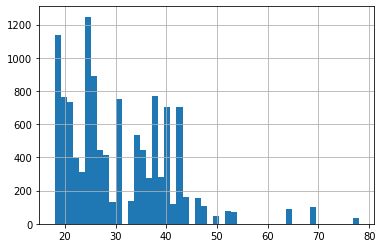

In [51]:
df['age'].hist(bins=50)

## 6. Timeseries analysis <a class="anchor" id="sec_6"></a>

In [52]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [53]:
df = df.set_index(df['date'])

In [54]:
# Add columns with year, month, and weekday name
df['day'] = df.index.day
df['month'] = df.index.month
df['month_name'] = df.index.month_name()
df['year'] = df.index.year
df['weekday_name'] = df.index.day_name()
df['week_number'] = df.index.week

In [55]:
df['week_number'] = "week"+ " "+df['week_number'].astype(str)

In [56]:
df.head(10)

,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,customer_long,customer_lat,merchant_long,merchant_lat,time,day,month,month_name,year,weekday_name,week_number
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.41,-27.95,153.38,-27.99,01:01:15,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,153.41,-27.95,151.21,-33.87,01:13:45,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.23,-33.94,151.21,-33.87,01:26:15,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.10,-27.66,153.05,-26.68,01:38:45,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.41,-27.95,153.44,-28.06,01:51:15,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-1608363396,PAYMENT,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01 02:00:00+00:00,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,151.22,-33.87,NaN,NaN,02:00:00,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-2776252858,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01 02:23:04+00:00,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95,-37.76,144.95,-37.53,02:23:04,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-2776252858,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01 04:11:25+00:00,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.95,-37.76,144.96,-37.81,04:11:25,1,8,August,2018,Wednesday,week 31
2018-08-01,ACC-182446574,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01 04:40:00+00:00,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,116.06,-32.00,115.85,-31.9,04:40:00,1,8,August,2018,Wednesday,week 31


In [57]:
# Get the number of dates / entries in each month
df.groupby('month_name')['amount'].count()

month_name
August       3943
October      4087
September    4013
Name: amount, dtype: int64

In [58]:
# Get the sum of the amount per month
df.groupby('month_name')['amount'].sum()

month_name
August       729935.52
October      802798.47
September    730550.21
Name: amount, dtype: float64

### 6.1 Weekly transaction volume and amount

In [59]:
weekly_vol = df.groupby(['week_number']).count()['transaction_id']

In [60]:
weekly_vol_mean = round(weekly_vol.mean(),2)

In [61]:
# Get the sum of the amount per week
weekly_amt = df.groupby('week_number')['amount'].sum()

In [62]:
weekly_amt_mean = round(weekly_amt.mean(), 2)

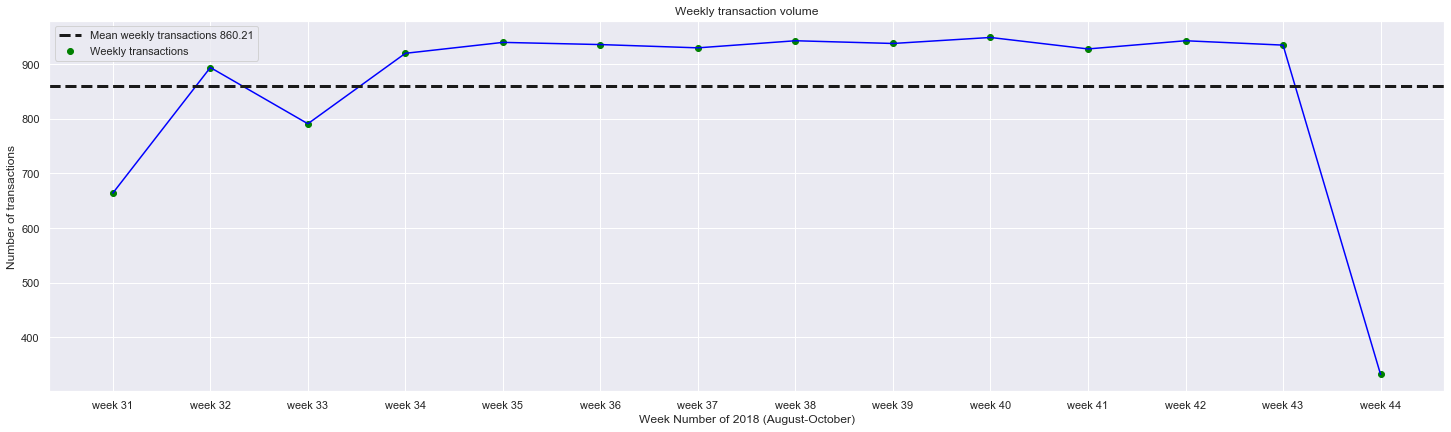

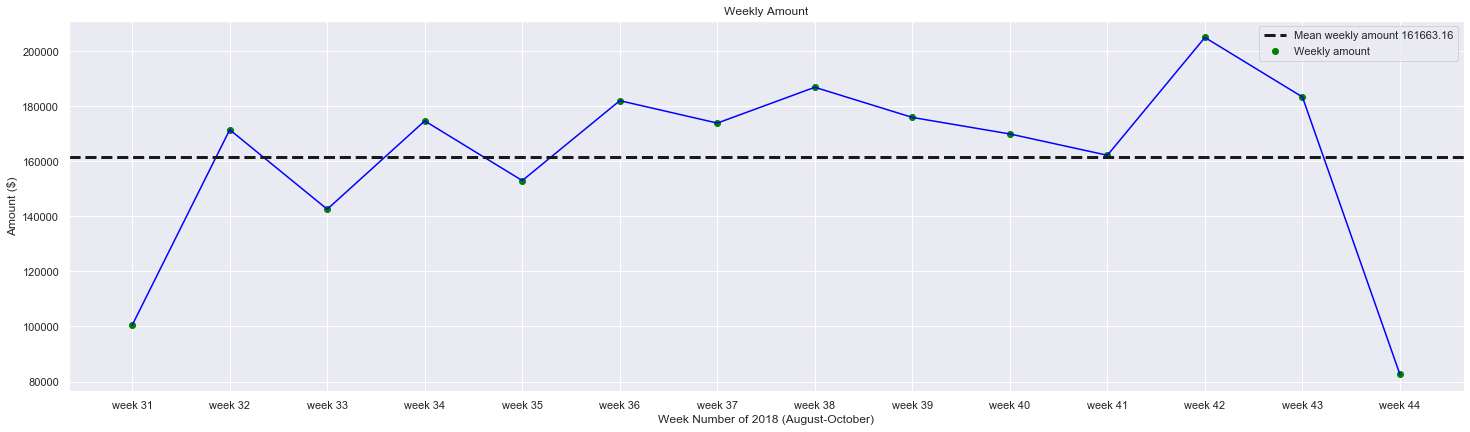

In [63]:
plt.figure(figsize=(25,15))
plt.subplot(2,1,1)
plt.scatter(weekly_vol.index, weekly_vol, c='green', label='Weekly transactions')
plt.plot(weekly_vol.index, weekly_vol, c='blue')
plt.axhline(weekly_vol_mean, color='k', linestyle='dashed', linewidth=3, label='Mean weekly transactions'+" "+str(weekly_vol_mean))
plt.title('Weekly transaction volume')
plt.xlabel("Week Number of 2018 (August-October)")
plt.ylabel("Number of transactions")
plt.legend()
plt.show()

plt.figure(figsize=(25,15))
plt.subplot(2,1,2)
plt.scatter(weekly_amt.index, weekly_amt, c='green', label='Weekly amount')
plt.plot(weekly_amt.index, weekly_amt, c='blue')
plt.axhline(weekly_amt_mean, color='k', linestyle='dashed', linewidth=3, label='Mean weekly amount'+" "+str(weekly_amt_mean))
plt.title('Weekly Amount')
plt.xlabel("Week Number of 2018 (August-October)")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

In [64]:
print(weekly_vol, weekly_amt)

week_number
week 31    664
week 32    894
week 33    791
week 34    920
week 35    940
week 36    936
week 37    930
week 38    943
week 39    938
week 40    949
week 41    928
week 42    943
week 43    935
week 44    332
Name: transaction_id, dtype: int64 week_number
week 31    100473.39
week 32    171413.59
week 33    142551.15
week 34    174612.19
week 35    152944.26
week 36    181961.34
week 37    173828.26
week 38    186827.62
week 39    175873.93
week 40    169876.63
week 41    162135.58
week 42    204909.09
week 43    183298.56
week 44     82578.61
Name: amount, dtype: float64


### 6.2 Everyday transaction volume

In [65]:
daily_vol = df.groupby(df['date'])['transaction_id'].count()

In [66]:
daily_vol_mean = round(daily_vol.mean(),2)

In [67]:
daily_amt = df.groupby(df['date'])['amount'].sum()

In [68]:
daily_amt_mean = round(daily_amt.mean(),2)

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


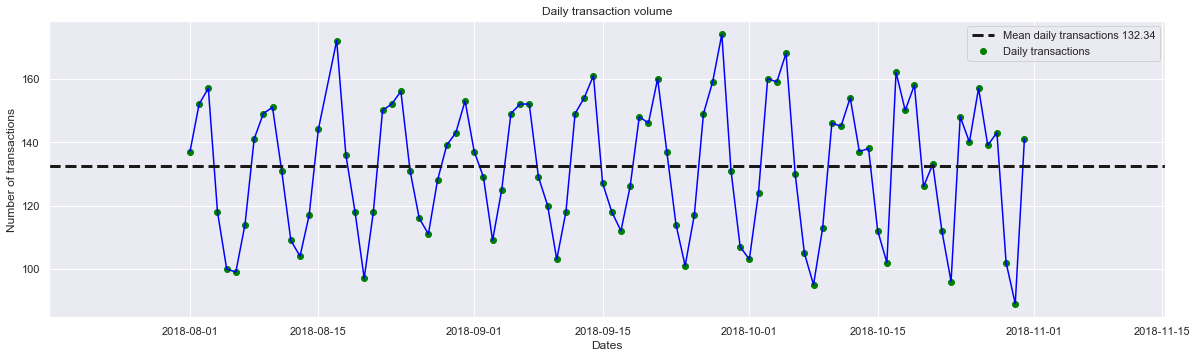

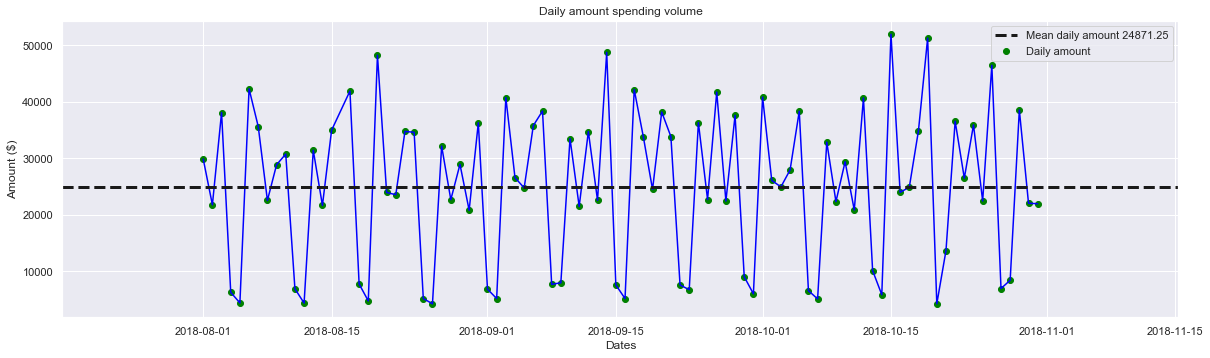

In [69]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.scatter(daily_vol.index, daily_vol, c='green', label='Daily transactions')
plt.plot(daily_vol.index, daily_vol, c='blue')
plt.axhline(daily_vol_mean, color='k', linestyle='dashed', linewidth=3, label='Mean daily transactions'+" "+str(daily_vol_mean))
plt.title('Daily transaction volume')
plt.xlabel("Dates")
plt.ylabel("Number of transactions")
plt.legend()
plt.show()

plt.figure(figsize=(20,12))
plt.subplot(2,1,2)
plt.scatter(daily_amt.index, daily_amt, c='green', label='Daily amount')
plt.plot(daily_amt.index, daily_amt, c='blue')
plt.axhline(daily_amt_mean, color='k', linestyle='dashed', linewidth=3, label='Mean daily amount'+" "+str(daily_amt_mean))
plt.title('Daily amount spending volume')
plt.xlabel("Dates")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

### 6.3 Aggregated daily volume and amount spending

In [70]:
# Aggregated daily transaction volume for the period of three months
# For example: - Transaction volumne on the 1st day of August, Sep and Oct combined

In [71]:
agg_daily_vol = df.groupby(['day']).count()['transaction_id']

In [72]:
agg_daily_vol_mean = round(agg_daily_vol.mean(),2)

In [73]:
# Aggregated daily amount

In [74]:
agg_daily_amt = df.groupby(['day']).sum()['amount']

In [75]:
agg_daily_amt_mean = round(agg_daily_amt.mean(),2)

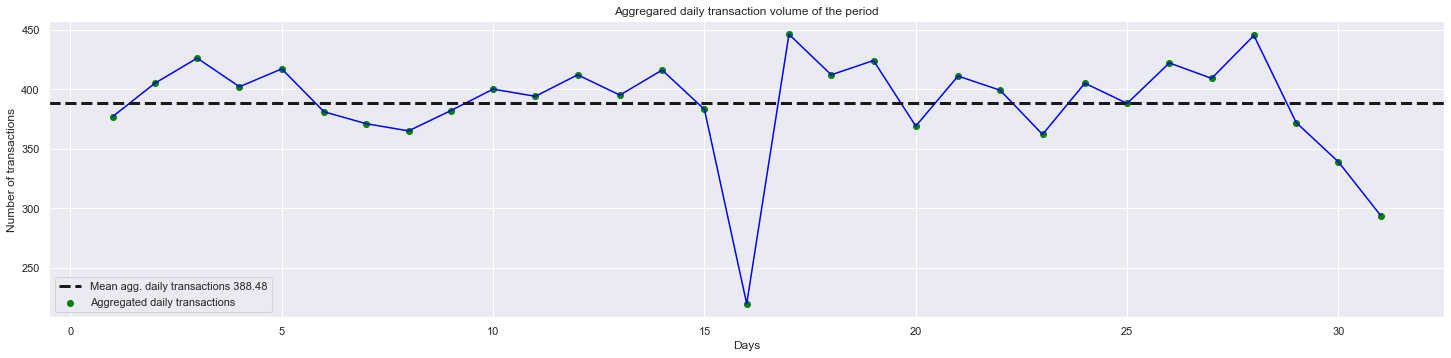

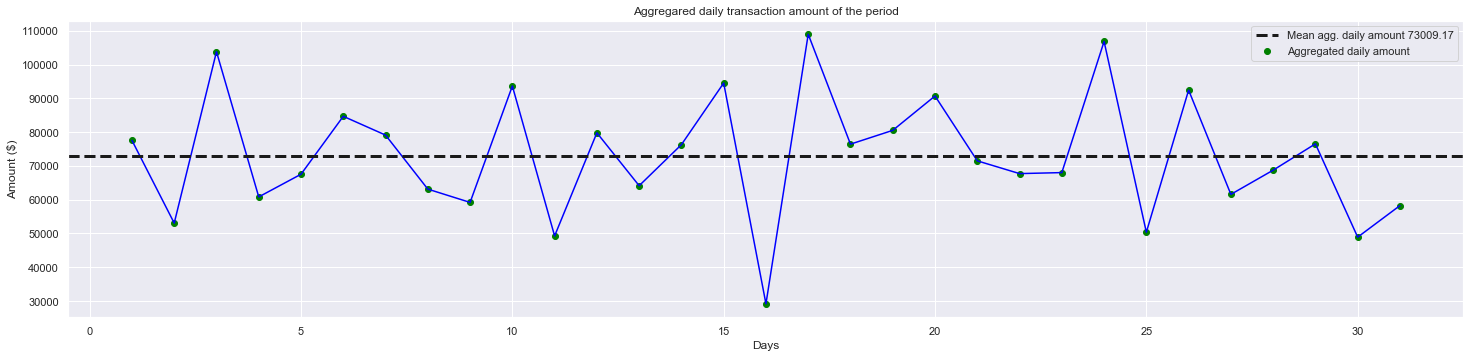

In [76]:
plt.figure(figsize=(25,12))
plt.subplot(2,1,1)
plt.scatter(agg_daily_vol.index, agg_daily_vol, c='green', label='Aggregated daily transactions')
plt.plot(agg_daily_vol.index, agg_daily_vol, c='blue')
plt.axhline(agg_daily_vol_mean, color='k', linestyle='dashed', linewidth=3, label='Mean agg. daily transactions'+" "+str(agg_daily_vol_mean))
plt.title('Aggregared daily transaction volume of the period')
plt.xlabel("Days")
plt.ylabel("Number of transactions")
plt.legend()
plt.show()

plt.figure(figsize=(25,12))
plt.subplot(2,1,2)
plt.scatter(agg_daily_amt.index, agg_daily_amt, c='green', label='Aggregated daily amount')
plt.plot(agg_daily_amt.index, agg_daily_amt, c='blue')
plt.axhline(agg_daily_amt_mean, color='k', linestyle='dashed', linewidth=3, label='Mean agg. daily amount'+" "+str(agg_daily_amt_mean))
plt.title('Aggregared daily transaction amount of the period')
plt.xlabel("Days")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

In [77]:
# We can see that on the 16th day the volume has dropped way below average. This will require further investigation to
# evaluate the reason why it has dropped. But it could be due to one of the months completely or partially missing
# the data for the date. Requires further confirmation.

In [78]:
# To check from which month the date 16th is missing.

In [79]:
start_date = df['date'][0]
end_date = df['date'][len(df['date'])-1]
numdays = (end_date - start_date).days
all_dates = []
dates_missing = []

for x in range (0, (numdays+1)):
    all_dates.append(start_date + datetime.timedelta(days = x))


for i in range (0, len(all_dates)):
    if (all_dates[i] not in df['date']):
        dates_missing.append(all_dates[i])
    else:
        pass

In [80]:
dates_missing

[Timestamp('2018-08-16 00:00:00')]

In [81]:
# We can now clearly conclude that the reason why above figures were showing big dip in the volume and amount
# is because 16th of August is missing from the dataset completely.

In [82]:
print(agg_daily_vol, agg_daily_amt)

day
1     377
2     405
3     426
4     402
5     417
6     381
7     371
8     365
9     382
10    400
11    394
12    412
13    395
14    416
15    383
16    220
17    446
18    412
19    424
20    369
21    411
22    399
23    362
24    405
25    388
26    422
27    409
28    445
29    372
30    339
31    294
Name: transaction_id, dtype: int64 day
1      77551.86
2      53073.61
3     103795.05
4      60825.68
5      67536.56
6      84679.66
7      79122.93
8      63130.44
9      59196.51
10     93643.28
11     49274.11
12     79796.62
13     64138.73
14     76293.73
15     94527.83
16     29179.98
17    108962.29
18     76441.49
19     80522.94
20     90696.64
21     71497.89
22     67720.85
23     68019.60
24    106824.90
25     50380.50
26     92433.21
27     61577.97
28     68738.01
29     76530.26
30     48915.33
31     58255.74
Name: amount, dtype: float64


### 6.4 Visualise weekday volume and amount spending

In [83]:
# Volume on an average weekday
weekday_vol = df.groupby('weekday_name', sort=False)['transaction_id'].count()#.astype('category')

In [84]:
weekday_vol = weekday_vol.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [85]:
weekday_vol_mean = round(weekday_vol.mean(),2)

In [86]:
# Volume on an average weekday
weekday_amt = df.groupby('weekday_name', sort=False)['amount'].sum()

In [87]:
weekday_amt = weekday_amt.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [88]:
weekday_amt_mean = round(weekday_amt.mean(),2)

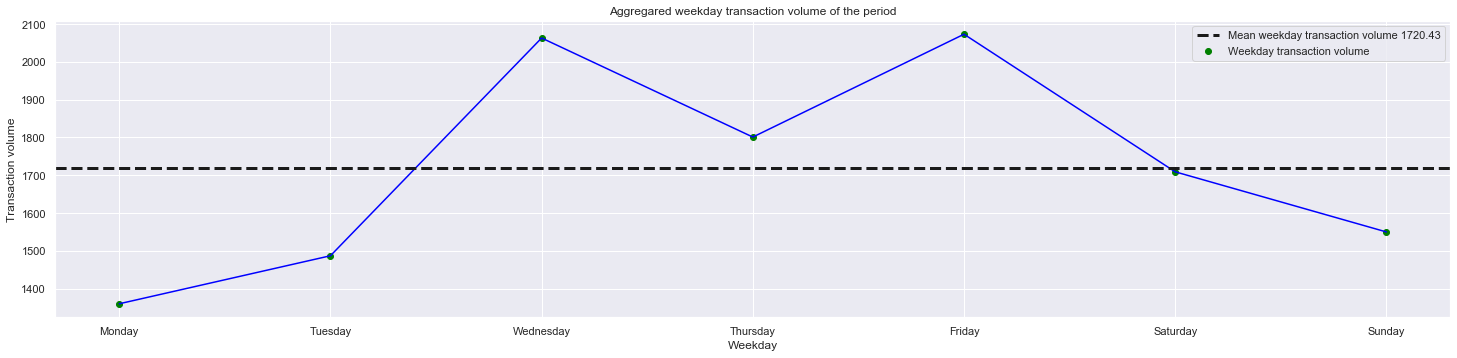

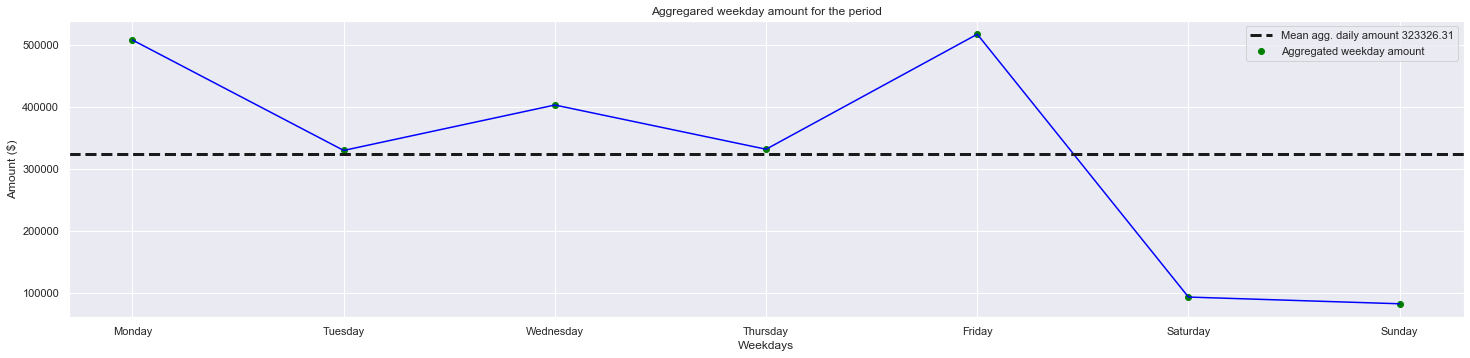

In [89]:
plt.figure(figsize=(25,12))
plt.subplot(2,1,1)
plt.scatter(weekday_vol.index, weekday_vol, c='green', label='Weekday transaction volume')
plt.plot(weekday_vol.index, weekday_vol, c='blue')
plt.axhline(weekday_vol_mean, color='k', linestyle='dashed', linewidth=3, label='Mean weekday transaction volume'+" "+str(weekday_vol_mean))
plt.title('Aggregared weekday transaction volume of the period')
plt.xlabel("Weekday")
plt.ylabel("Transaction volume")
plt.legend()
plt.show()

plt.figure(figsize=(25,12))
plt.subplot(2,1,2)
plt.scatter(weekday_amt.index, weekday_amt, c='green', label='Aggregated weekday amount')
plt.plot(weekday_amt.index, weekday_amt, c='blue')
plt.axhline(weekday_amt_mean, color='k', linestyle='dashed', linewidth=3, label='Mean agg. daily amount'+" "+str(weekday_amt_mean))
plt.title('Aggregared weekday amount for the period')
plt.xlabel("Weekdays")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

In [90]:
print(weekday_vol, weekday_amt)

weekday_name
Monday       1360
Tuesday      1487
Wednesday    2063
Thursday     1801
Friday       2073
Saturday     1709
Sunday       1550
Name: transaction_id, dtype: int64 weekday_name
Monday       507580.56
Tuesday      329484.19
Wednesday    402729.72
Thursday     331402.77
Friday       516909.84
Saturday      93002.56
Sunday        82174.56
Name: amount, dtype: float64


### 6.5 Age vs Amount and Balance

In [91]:
age_amt = df.groupby(['age']).sum()['amount']

In [92]:
age_amt_mean = round(age_amt.mean(),2)

In [93]:
age_amt_mean

68584.37

In [94]:
age_bal = df.groupby(['age']).sum()['balance']

In [95]:
age_bal_mean = round(age_bal.mean(),2)

In [96]:
age_bal_mean

5366140.21

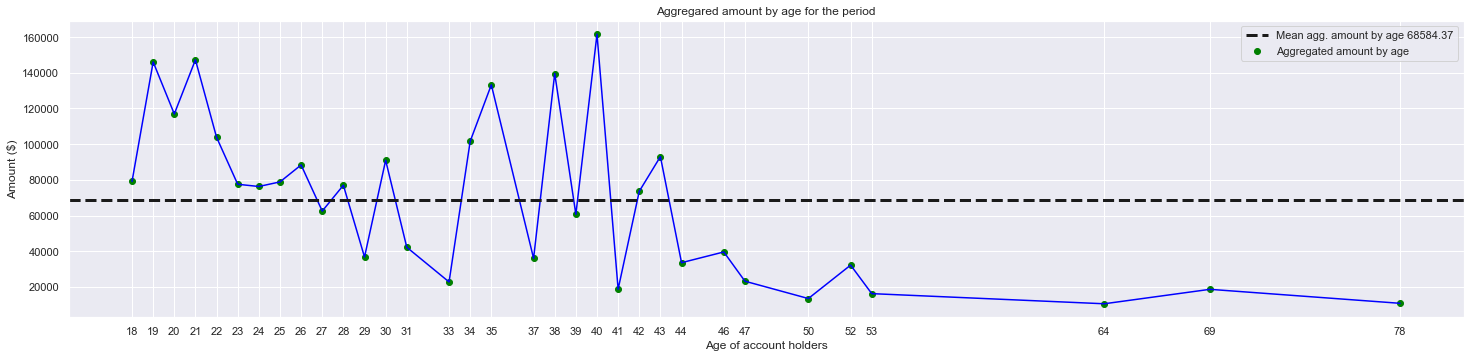

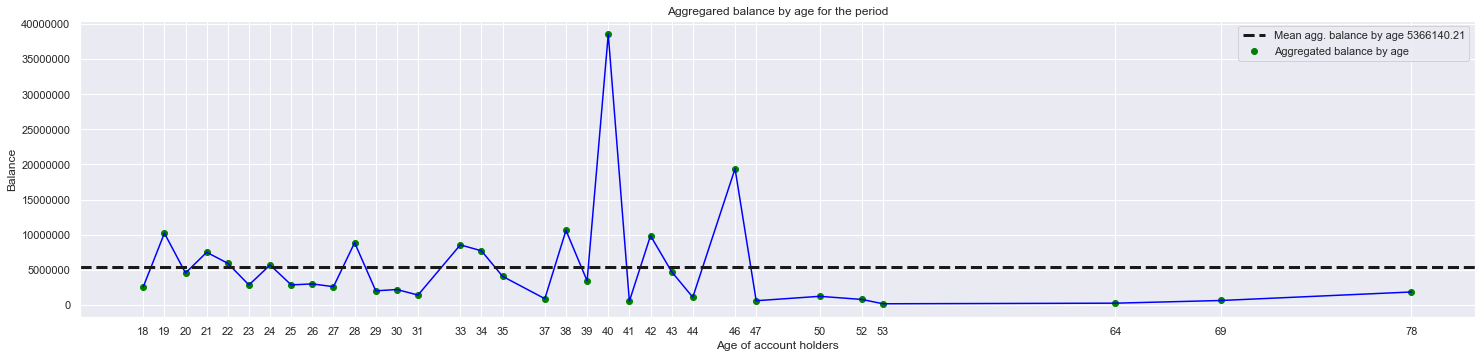

In [97]:
plt.figure(figsize=(25,12))
plt.subplot(2,1,1)
plt.scatter(age_amt.index, age_amt, c='green', label='Aggregated amount by age')
plt.plot(age_amt.index, age_amt, c='blue')
plt.axhline(age_amt_mean, color='k', linestyle='dashed', linewidth=3, label='Mean agg. amount by age'+" "+str(age_amt_mean))
plt.title('Aggregared amount by age for the period')
plt.xlabel("Age of account holders")
plt.ylabel("Amount ($)")
plt.xticks(age_amt.index)
plt.legend()
plt.show()

plt.figure(figsize=(25,12))
plt.subplot(2,1,2)
plt.scatter(age_bal.index, age_bal, c='green', label='Aggregated balance by age')
plt.plot(age_bal.index, age_bal, c='blue')
plt.axhline(age_bal_mean, color='k', linestyle='dashed', linewidth=3, label='Mean agg. balance by age'+" "+str(age_bal_mean))
plt.ticklabel_format(style = 'plain')
plt.title('Aggregared balance by age for the period')
plt.xlabel("Age of account holders")
plt.ylabel("Balance")
plt.xticks(age_bal.index)
plt.legend()
plt.show()

### 6.6 Top 10 customers with highest balance at the end of the period.

In [98]:
df_lastday = df.loc[df['date'].isin(['31-10-2018'])]
df_lastday.groupby(['customer_id','first_name','age'])['balance'].max().sort_values(ascending=False).head(10)

customer_id     first_name  age
CUS-2370108457  Patrick     46     266639.88
CUS-527400765   Natasha     40     208819.21
CUS-495599312   Jonathan    38      63244.13
CUS-2663907001  Craig       28      45394.57
CUS-3249305314  Ryan        38      44870.07
CUS-3151318058  Eric        42      43543.84
CUS-2059096722  Michael     21      42487.02
CUS-1196156254  Jessica     34      30928.21
CUS-261674136   Kenneth     29      24814.66
CUS-3142625864  Ricky       43      24779.11
Name: balance, dtype: float64

### 6.7 Top 10 customers with highest pay/salaries

In [99]:
df_salary = df.loc[df['txn_description'].isin(['PAY/SALARY'])]

In [100]:
df_salary.groupby(['customer_id','first_name','age']).sum()['amount'].sort_values(ascending=False).head(10)

customer_id     first_name  age
CUS-1816693151  Tim         40     35343.92
CUS-3142625864  Ricky       43     33644.13
CUS-2738291516  Kenneth     35     33081.88
CUS-2155701614  Linda       35     31762.12
CUS-261674136   Kenneth     29     30837.10
CUS-2031327464  Michael     40     29644.68
CUS-527400765   Natasha     40     29512.28
CUS-3336454548  Charles     18     28925.61
CUS-883482547   Michelle    19     27842.22
CUS-1462656821  Isaiah      23     27327.65
Name: amount, dtype: float64

### 6.8 Which age group is getting paid the most salary

In [101]:
df_salary.groupby(['age']).sum()['amount'].sort_values(ascending=False).head(10)

age
40    131403.46
19    115785.36
21    107137.60
38    102155.48
35     98618.21
20     84511.81
22     81124.69
34     74197.45
43     67016.44
23     62873.60
Name: amount, dtype: float64

### 6.9 Merchant analysis

In [102]:
df_merchant = df.loc[df['txn_description'].isin(['Pos','SALES-POS'])]

In [103]:
# Top 10 suburbs of customer spending

In [104]:
df_merchant.groupby(['merchant_suburb', 'merchant_state']).sum()['amount'].sort_values(ascending=False).head(10)

merchant_suburb  merchant_state
Sydney           NSW               11923.00
Melbourne        VIC                8358.63
Mascot           NSW                7470.73
Malvern          VIC                3148.33
Parap            NT                 2619.33
Maribyrnong      VIC                2056.33
Abbotsford       VIC                1922.26
Mount Gambier    SA                 1906.05
Newtown          NSW                1843.36
Keilor Park      VIC                1838.11
Name: amount, dtype: float64

In [105]:
# Top 10 merchant with most sales

In [106]:
df_merchant.groupby(['merchant_id','merchant_suburb', 'merchant_state']).sum()['amount'].sort_values(ascending=False).head(10)

merchant_id                           merchant_suburb  merchant_state
e5b2b589-812a-44a1-a1bb-403d9ee9a1b4  Mascot           NSW               7118.85
28d6a5ac-52c7-42f0-96ee-80140a350d8d  Melbourne        VIC               3680.71
5689d17d-5202-4ad5-9333-2505f051c5dd  Parap            NT                2567.93
722430c6-39e6-4570-9323-3db6191e6548  Malvern          VIC               2541.95
21e5f1e5-92db-46b6-bf42-2039fd9cc52a  Abbotsford       VIC               1909.04
3a07b841-ea22-4cd7-b378-a46239d1c282  Maribyrnong      VIC               1883.04
7dee69cf-5736-4247-bccb-f9a0892ae760  Keilor Park      VIC               1807.42
174c502e-6804-4d22-bf4c-2b362b0b9c14  Newtown          NSW               1634.46
d00d2c9a-883a-4564-806f-54b6533d5472  Sydney           NSW               1557.91
b04f283c-5807-4329-ad1d-a113d5f25bc1  Doncaster East   VIC               1371.67
Name: amount, dtype: float64

In [107]:
# Top 10 merchant with most transactions

In [108]:
df_merchant.groupby(['merchant_id','merchant_suburb', 'merchant_state']).count()['transaction_id'].sort_values(ascending=False).head(10)

merchant_id                           merchant_suburb  merchant_state
106e1272-44ab-4dcb-a438-dd98e0071e51  Eden             NSW               11
6c84c219-96ea-4c6f-9de5-0a28bcaec62f  Rainbow Flat     NSW                8
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f  Boggabri         NSW                7
dd2927c4-ccc2-4aa7-be03-ca93ae8f77ad  Aratula          QLD                6
6102e64f-516d-4b51-bc28-87dbfe089f5c  Southbank        VIC                5
6ddddc40-5b69-4253-8a26-167999a8bf96  Castlemaine      VIC                5
294193ff-d76e-445f-b240-dea59df2caf8  Broken Hill      NSW                5
f7f1a4c4-9947-47f5-a461-2fed2ca3324c  Melbourne        VIC                5
d00d2c9a-883a-4564-806f-54b6533d5472  Sydney           NSW                5
3075b265-3b29-4d54-a38e-c379113f73bf  Balingup         WA                 4
Name: transaction_id, dtype: int64

In [109]:
# Top 10 customers spending most amount

In [110]:
df_merchant.groupby(['customer_id', 'first_name', 'age']).sum()['amount'].sort_values(ascending=False).head(10)

customer_id     first_name  age
CUS-2738291516  Kenneth     35     5768.52
CUS-325142416   Jessica     21     5020.71
CUS-2487424745  Diana       26     4988.24
CUS-4142663097  Sandra      34     4556.75
CUS-4023861240  James       28     3622.27
CUS-2206365095  Renee       38     3514.25
CUS-1614226872  Rhonda      40     3445.86
CUS-1117979751  Lucas       21     3369.45
CUS-860700529   Jeffrey     30     3251.17
CUS-1669695324  Tiffany     25     3224.68
Name: amount, dtype: float64

In [111]:
df_merchant.groupby(['customer_id', 'first_name', 'age']).count()['transaction_id'].sort_values(ascending=False).head(10)

customer_id     first_name  age
CUS-2487424745  Diana       26     272
CUS-3026014945  Tonya       27     123
CUS-2142601169  Michael     38     122
CUS-1614226872  Rhonda      40     109
CUS-860700529   Jeffrey     30     109
CUS-3378712515  Kimberly    24     106
CUS-2695611575  Joseph      37     101
CUS-51506836    Richard     24      96
CUS-1196156254  Jessica     34      89
CUS-1669695324  Tiffany     25      88
Name: transaction_id, dtype: int64

## 7. Location analysis <a class="anchor" id="sec_7"></a>

In [112]:
# Plot top 5 customers with most pos locations and merchant ids

In [113]:
top_pos_cust_id = df_merchant.groupby(['customer_id','first_name']).count()['transaction_id'].sort_values(ascending=False).head(5).index.to_list()

In [114]:
top_pos_cust_id

[('CUS-2487424745', 'Diana'),
 ('CUS-3026014945', 'Tonya'),
 ('CUS-2142601169', 'Michael'),
 ('CUS-1614226872', 'Rhonda'),
 ('CUS-860700529', 'Jeffrey')]

In [115]:
import folium
from folium.plugins import BeautifyIcon

In [116]:
# Draw Australia map

In [117]:
# m = folium.Map([-31, 133], zoom_start=4)#, tiles='CartoDB positron')
# m

In [118]:
# Display all the merchant locations in the dataset

In [119]:
def plot_map(cust_list):
    i, j = cust_list
    j = j.lower()
    j = pd.DataFrame(df_merchant[df_merchant['customer_id']==i])
    #print(j)

    m = folium.Map([-31, 133], zoom_start=4)
    for index, row in j.iterrows():

        icon_circle = BeautifyIcon(
        icon_shape='circle-dot', 
        border_color='#FF5050', 
        border_width=6,
        )

        folium.Marker([row['merchant_lat'], row['merchant_long']],
                    tooltip=[row['merchant_suburb'],str(row['extraction'])],
                    icon= icon_circle).add_to(m)

        
        folium.Marker([row['customer_lat'], row['customer_long']],
                      popup=row['first_name'],
                      tooltip=row['first_name']).add_to(m)

    return m

In [120]:
plot_map(top_pos_cust_id[0])

In [121]:
plot_map(top_pos_cust_id[1])

In [122]:
plot_map(top_pos_cust_id[2])

In [123]:
plot_map(top_pos_cust_id[3])

In [124]:
plot_map(top_pos_cust_id[4])

### 7.1 Plot customer locations

In [125]:
cust_map = folium.Map([15, 0], zoom_start=1)

In [126]:
for index, row in df.iterrows():
    
    icon_circle = BeautifyIcon(
        icon_shape='circle-dot', 
        border_color='#009900', 
        border_width=6,
        )
    
    folium.Marker([row['customer_lat'], row['customer_long']],
              #popup=row['first_name'],
              tooltip=row['first_name'], 
              icon= icon_circle).add_to(cust_map)

In [127]:
# Run below variable to plot the map of all customers by removing the hash in front of it. 

In [128]:
#cust_map

Screen Shot 2020-07-21 at 4.41.06 pm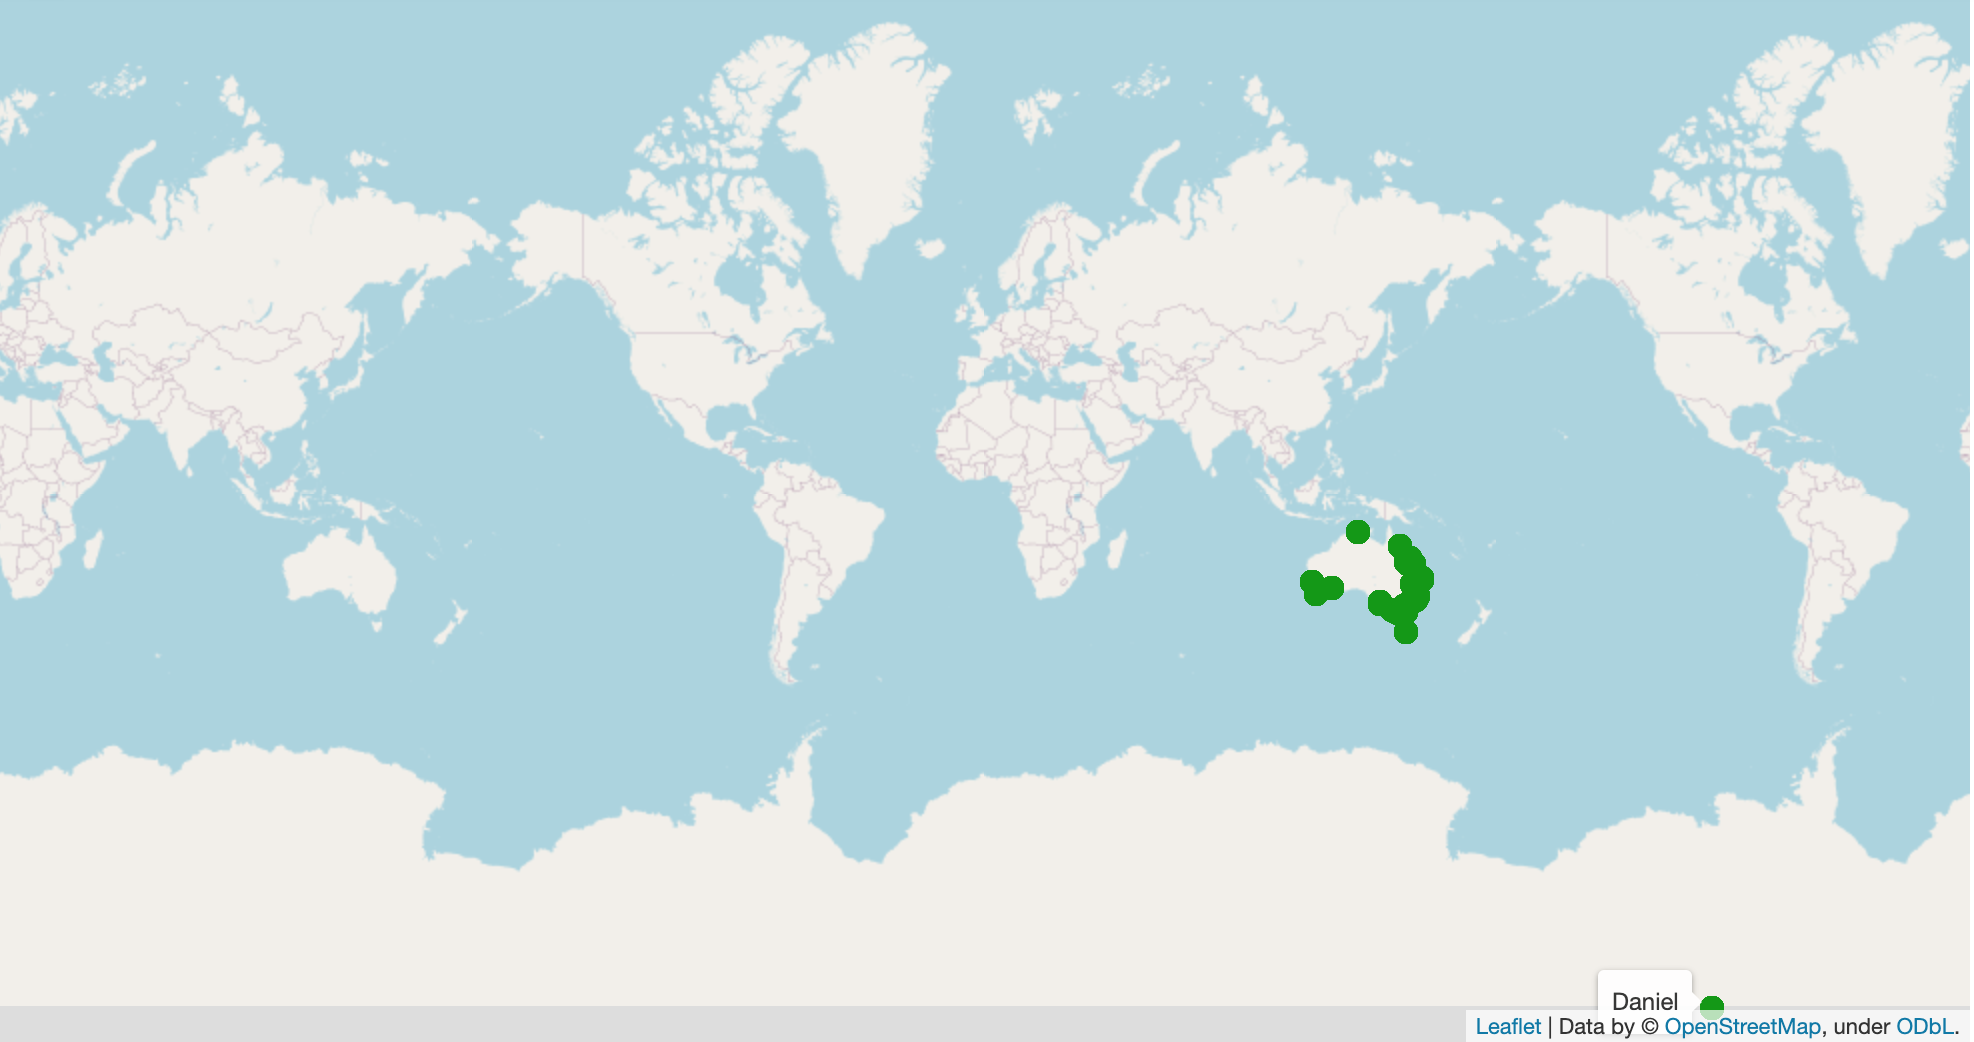

In [129]:
# We can notice that a customer named Daniel is not located in Australia. 
# This seems to be a data error as the customer is not located in a country region.